In [2]:
import os
import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [3]:
model = keras.models.load_model("./Element1_CNN.keras")
# model.summary()

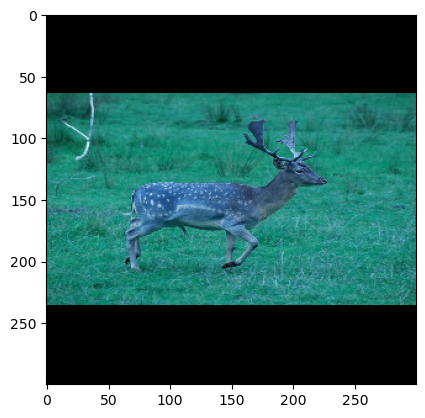

In [5]:
path = "./TestImages/testimage1.jpg"
target_shape=(300,300)
image = cv.imread(path, cv.IMREAD_COLOR)
image_shape=image.shape # (height, width, depth)

if image_shape > target_shape:
    if np.argmax(image_shape) == 1:
        width_dif= 0
        height_dif= image_shape[0] - target_shape[0] 
    
    else:
        width_dif= image_shape[1] - target_shape[1]
        height_dif= 0
else:
    if np.argmax(image_shape) == 1:
        width_dif= (target_shape[1] - image_shape[1]) 
        height_dif= 0
        
    else:
        width_dif= 0
        height_dif= (target_shape[0] - image_shape[0]) 
            
image = cv.copyMakeBorder(
    image, 
    int(height_dif), 
    int(height_dif), 
    int(width_dif), 
    int(width_dif), 
    cv.BORDER_CONSTANT, 
    value=(0, 0, 0)
)

image = cv.resize(image,target_shape)

plt.imshow(image)

This code resizes images to 300 by 300. It trys to keep the aspect ration by padding the edges. This should make the classification more effective as this is what the model was trained with.

In [6]:
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)
print(predictions)
prediction=np.argmax(predictions)
classes = ["bicycles", "cars", "deer", "mountains"]
print(f"This picture is of {classes[prediction]}!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
[[2.20681671e-02 2.09250487e-04 1.22063495e-01 8.55659127e-01]]
This picture is of mountains!
